In [4]:
import matplotlib.pyplot as plt
import math
import numpy as np
from matplotlib.widgets import TextBox

In [9]:
import matplotlib as mpl
import matplotlib.patheffects

def center_spines(ax=None, centerx=0, centery=0):
    """Centers the axis spines at <centerx, centery> on the axis "ax", and
    places arrows at the end of the axis spines."""
    if ax is None:
        ax = plt.gca()

    # Set the axis's spines to be centered at the given point
    # (Setting all 4 spines so that the tick marks go in both directions)
    ax.spines['left'].set_position(('data', centerx))
    ax.spines['bottom'].set_position(('data', centery))
    ax.spines['right'].set_position(('data', centerx - 1))
    ax.spines['top'].set_position(('data', centery - 1))

    # Draw an arrow at the end of the spines
#     ax.spines['left'].set_path_effects([EndArrow()])
#     ax.spines['bottom'].set_path_effects([EndArrow()])

    # Hide the line (but not ticks) for "extra" spines
    for side in ['right', 'top']:
        ax.spines[side].set_color('none')

    # On both the x and y axes...
    for axis, center in zip([ax.xaxis, ax.yaxis], [centerx, centery]):
        # Turn on minor and major gridlines and ticks
        axis.set_ticks_position('both')
        axis.grid(True, 'major', ls='solid', lw=0.5, color='gray')
        axis.grid(True, 'minor', ls='solid', lw=0.1, color='gray')
        axis.set_minor_locator(mpl.ticker.AutoMinorLocator())

        # Hide the ticklabels at <centerx, centery>
        formatter = CenteredFormatter()
        formatter.center = center
        axis.set_major_formatter(formatter)

    # Add offset ticklabels at <centerx, centery> using annotation
    # (Should probably make these update when the plot is redrawn...)
    xlabel, ylabel = map(formatter.format_data, [centerx, centery])
    ax.annotate('(%s, %s)' % (xlabel, ylabel), (centerx, centery),
            xytext=(-4, -4), textcoords='offset points',
            ha='right', va='top')

# Note: I'm implementing the arrows as a path effect rather than a custom 
#       Spines class. In the long run, a custom Spines class would be a better
#       way to go. One of the side effects of this is that the arrows aren't
#       reversed when the axes are reversed!

# class EndArrow(mpl.patheffects):
#     pass
#     """A matplotlib patheffect to add arrows at the end of a path."""
#     def __init__(self, headwidth=5, headheight=5, facecolor=(0,0,0), **kwargs):
#         super(mpl.patheffects._Base, self).__init__()
#         self.width, self.height = headwidth, headheight
#         self._gc_args = kwargs
#         self.facecolor = facecolor

#         self.trans = mpl.transforms.Affine2D()

#         self.arrowpath = mpl.path.Path(
#                 np.array([[-0.5, -0.2], [0.0, 0.0], [0.5, -0.2], 
#                           [0.0, 1.0], [-0.5, -0.2]]),
#                 np.array([1, 2, 2, 2, 79]))

#     def draw_path(self, renderer, gc, tpath, affine, rgbFace):
#         scalex = renderer.points_to_pixels(self.width)
#         scaley = renderer.points_to_pixels(self.height)

#         x0, y0 = tpath.vertices[-1]
#         dx, dy = tpath.vertices[-1] - tpath.vertices[-2]
#         azi =  np.arctan2(dy, dx) - np.pi / 2.0 
#         trans = affine + self.trans.clear(
#                 ).scale(scalex, scaley
#                 ).rotate(azi
#                 ).translate(x0, y0)

#         gc0 = renderer.new_gc()
#         gc0.copy_properties(gc)
#         self._update_gc(gc0, self._gc_args)

#         if self.facecolor is None:
#             color = rgbFace
#         else:
#             color = self.facecolor

#         renderer.draw_path(gc0, self.arrowpath, trans, color)
#         renderer.draw_path(gc, tpath, affine, rgbFace)
#         gc0.restore()

class CenteredFormatter(mpl.ticker.ScalarFormatter):
    """Acts exactly like the default Scalar Formatter, but yields an empty
    label for ticks at "center"."""
    center = 0
    def __call__(self, value, pos=None):
        if value == self.center:
            return ''
        else:
            return mpl.ticker.ScalarFormatter.__call__(self, value, pos)

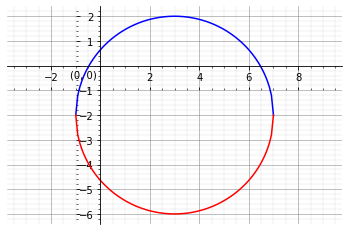

In [16]:
x = np.linspace(-1, 7, 100)
f = np.vectorize(lambda x: -2+math.sqrt(16-(x-3)**2))
y = f(x)

line, = plt.plot(x,y, color='blue')

x = np.linspace(-1, 7, 100)
f = np.vectorize(lambda x: -2-math.sqrt(16-(x-3)**2))
y = f(x)

line2, = plt.plot(x,y, color='red')

center_spines()
plt.axis('equal')
plt.show()

In [23]:
def y(start, stop, function):
    for func in function:
        x = np.linspace(start, stop, 100)
        f = np.vectorize(func)
        y = f(x)
    
        plt.plot(x,y)
    
    center_spines()
    plt.axis('equal')
    plt.show()

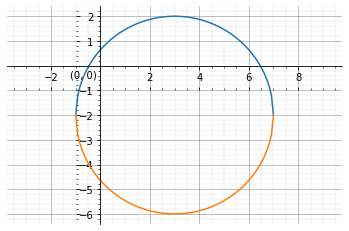

In [24]:
y(-1, 7, [lambda x: -2+math.sqrt(16-(x-3)**2), lambda x: -2-math.sqrt(16-(x-3)**2)])